## Import Module

In [1]:
import struct
import numpy as np
import pandas as pd
# import import_ipynb
from importnb import Notebook
with Notebook(): 
    import NN_HW3_sm as NN
    import CNN_pool_class as CNN
from tqdm import tqdm, trange, notebook
from matplotlib import pyplot as plt
np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Read Data Function

In [2]:
def read_data(image_dir, label_dir):
    with open(image_dir, 'rb') as file:
        magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
        
        buf = file.read(size * rows * cols)
        img_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float64)
        img_data = img_data.reshape(size, 1, rows, cols)
        img_data = img_data / 255
        
    
    with open(label_dir, 'rb') as file:
        magic, size = struct.unpack(">II", file.read(8))
        
        buf = file.read(size)
        lab_data_tmp = np.frombuffer(buf, dtype=np.uint8).astype(np.uint16)
        lab_data_tmp = lab_data_tmp.reshape(size)
        
#     print(lab_data[0:111])
    lab_data = np.zeros((size, 10), dtype=np.uint16)
    for i in range(size):
        lab_data[i][ lab_data_tmp[i] ] = 1
    
#     print(lab_data[0:10])
    
    
    return img_data.copy(), lab_data.copy()

In [3]:
# print(np.frombuffer(b'\x02\x01\x00\x00', dtype=np.uint16))
train_data, train_label  = read_data('./MNIST/train-images-idx3-ubyte', './MNIST/train-labels-idx1-ubyte')
test_data, test_label  = read_data('./MNIST/t10k-images-idx3-ubyte', './MNIST/t10k-labels-idx1-ubyte')

In [4]:
print((train_data[0]))

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
  

## Dataset Label

In [5]:
def preprocess_input(x):
    return x

ans = preprocess_input(train_data[0])
ans1 = preprocess_input(test_data[1])
print(ans)
print(ans1)
# print(train_data[0:10])

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
  

In [6]:

def construct_model(model):
    #### First Convolution + pooling
    # func, d_func, last_layer, input_size, input_num, filter_size, filter_num, stride
    model.layer_list.append( CNN.ConvLayer(NN.Sigmoid, NN.d_Sigmoid, 1, input_size=28, input_num=1, filter_size=5, filter_num=3, stride=1, is_first=True))
    # last_layer, input_size, input_num, filter_size, stride
#     model.layer_list.append( CNN.AvgPooling(model.layer _list[len(model.layer_list)-1], input_size=24, input_num=3, filter_size=4, stride=2, is_first=False))   
    
    #### Second Convolution + pooling
    # func, d_func, last_layer, input_size, input_num, filter_size, filter_num, stride
    model.layer_list.append( CNN.ConvLayer(NN.ReLU, NN.d_ReLU, model.layer_list[len(model.layer_list)-1], input_size=24, input_num=3, filter_size=3, filter_num=5, stride=1, is_first=False))
#     model.layer_list.append( CNN.ConvLayer(NN.ReLU, NN.d_ReLU, model.layer_list[len(model.layer_list)-1], input_size=11, input_num=3, filter_size=3, filter_num=5, stride=1, is_first=False))
    # last_layer, input_size, input_num, filter_size, stride
#     model.layer_list.append( CNN.AvgPooling(model.layer_list[len(model.layer_list)-1], input_size=model.layer_list[len(model.layer_list)-1].get_output_size(), input_num=5, filter_size=3, stride=1, is_first=False))       
    
    # last_layer, input_size, input_num
    model.layer_list.append( CNN.Flattening(model.layer_list[len(model.layer_list)-1], input_size=model.layer_list[len(model.layer_list)-1].get_output_size(), input_num=5, is_first=False))
    
    #### First MLP
    # func, d_func, node_num, last_layer, is_first
    model.layer_list.append( NN.Layer_vec(NN.ReLU, NN.d_ReLU, 100, model.layer_list[len(model.layer_list)-1], False) )
    
    #### Second MLP
    # func, d_func, node_num, last_layer, is_first
    model.layer_list.append( NN.Layer_vec(NN.ReLU, NN.d_ReLU, 64, model.layer_list[len(model.layer_list)-1], False) )
    
    #### Third MLP
    # func, d_func, node_num, last_layer, is_first
    model.layer_list.append( NN.Layer_vec(NN.ReLU, NN.d_ReLU, 10, model.layer_list[len(model.layer_list)-1], False) )
    
    #### Output Layer
    model.layer_list.append( NN.Softmax_Output(model.layer_list[len(model.layer_list)-1]) )
    print(model.layer_list)
            

In [7]:
##############################################################
#                         MODEL block                        #
##############################################################

# with Notebook(): 
#     import NN_HW3_sm as NN
# lr_rate = 0.00009
epochs = 50

lr_rate = 0.001
batch_size = 100
# layer_nums = [train_data.shape[1]-1, 7, 1]
test_m = NN.Model(construct_model, batch_size, lr_rate)

train_loss = []
test_loss = []
train_acc = []
test_acc = []
output_node_w = [[]]
output_node_w = np.array([test_m.get_output_w()])
need_update = False

for epoch in range(epochs):
    train_err_cnt = 0
    train_error = []
    print(epoch+1, "/", epochs, "epochs")
    train_progress = notebook.tqdm(total=len(train_data), desc="Training")
    test_progress = notebook.tqdm(total=len(test_data), desc="Testing")
    for i, input_data in enumerate(train_data):
#     for i, input_data in enumerate(train_data[0:100]):
        
        if i % batch_size == 0:
            need_update = True
        train_progress.update(1)
        p_data = preprocess_input(input_data)
        test_m.cal_network(p_data)
        
        ans_conf = test_m.get_result()
        ans = np.argmax(ans_conf)
        std = np.argmax(train_label[i])
        if ans != std:
            train_err_cnt += 1
        
        # Adjust model weights
        p_loss = test_m.adjust_model(train_label[i], need_update)
        train_error.append(p_loss)
        
        need_update = False
#         print("ans_conf:　", ans_conf, "ans: ", ans, "train_label[i]:　", train_label[i], "std: ", std, "p_loss: ", p_loss)
#         print(test_m.get_output_w())
    output_node_w = np.append(output_node_w, [test_m.get_output_w()], 0)
        
    train_loss.append(np.average(train_error))
    train_acc.append(1 - train_err_cnt/len(train_data) )
    print("Train loss: ", np.average(train_error), ", acc = ", (1-train_err_cnt/len(train_data)) * 100, "%")
    test_err_cnt = 0
    test_error = []
    for i, input_data in enumerate(test_data):
#     for i, input_data in enumerate(test_data[0:10]):
        # print(i, "'s data !!!")
        test_progress.update(1)
        
        p_data = preprocess_input(input_data)
        test_m.cal_network(p_data)
        ans_conf = test_m.get_result()
        ans = np.argmax(ans_conf)
        std = np.argmax(test_label[i])
        if ans != std:
            test_err_cnt += 1
        
        
        p_loss = test_m.get_loss(test_label[i])
        test_error.append(p_loss)
        
        
    test_loss.append(np.average(test_error))
    test_acc.append(1 - test_err_cnt/len(test_data) )
    print("Test loss: ", np.average(test_error), ", acc = ", (1-test_err_cnt/len(test_data)) * 100, "%")
    print()
test_m.get_loss()

[<CNN_pool_class.ConvLayer object at 0x000001FE217CC6A0>, <CNN_pool_class.ConvLayer object at 0x000001FE217CC710>, <CNN_pool_class.Flattening object at 0x000001FE217CC748>, <NN_HW3_sm.Layer_vec object at 0x000001FE217CC780>, <NN_HW3_sm.Layer_vec object at 0x000001FE1E6CDAC8>, <NN_HW3_sm.Layer_vec object at 0x000001FE21789B70>, <NN_HW3_sm.Softmax_Output object at 0x000001FE1E6CD048>]
1 / 50 epochs


Train loss:  1.2042412233430502 , acc =  57.89500000000001 %
Test loss:  0.47057105019644413 , acc =  83.62 %

2 / 50 epochs


Train loss:  0.39211508979545545 , acc =  86.07166666666667 %
Test loss:  0.372923394691081 , acc =  86.37 %

3 / 50 epochs


Train loss:  0.342009302732345 , acc =  87.395 %
Test loss:  0.34589916281684985 , acc =  87.2 %

4 / 50 epochs


Train loss:  0.3158624116488417 , acc =  87.91833333333334 %
Test loss:  0.3314593612148492 , acc =  87.45 %

5 / 50 epochs


Train loss:  0.3003071194149042 , acc =  88.26166666666666 %
Test loss:  0.33133028133890613 , acc =  87.42 %

6 / 50 epochs


Train loss:  0.28850849238770615 , acc =  88.65833333333333 %
Test loss:  0.3309608226677718 , acc =  87.46000000000001 %

7 / 50 epochs


Train loss:  0.18423936998220683 , acc =  93.05 %
Test loss:  0.09671029299178281 , acc =  97.33000000000001 %

8 / 50 epochs


Train loss:  0.054200600346565944 , acc =  98.405 %
Test loss:  0.09035100278001564 , acc =  97.41 %

9 / 50 epochs


Train loss:  0.04363020898538651 , acc =  98.72833333333332 %
Test loss:  0.08112968016959886 , acc =  97.69 %

10 / 50 epochs


Train loss:  0.03664579870627803 , acc =  98.91833333333334 %
Test loss:  0.0851096707642011 , acc =  97.6 %

11 / 50 epochs


Train loss:  0.03185326579343595 , acc =  99.07333333333334 %
Test loss:  0.0789730545702712 , acc =  97.83 %

12 / 50 epochs


Train loss:  0.026742915943021178 , acc =  99.19833333333334 %
Test loss:  0.08720360653152004 , acc =  97.69 %

13 / 50 epochs


Train loss:  0.02381420804131537 , acc =  99.28 %
Test loss:  0.08570327050563119 , acc =  97.76 %

14 / 50 epochs


Train loss:  0.020994259985138954 , acc =  99.35833333333333 %
Test loss:  0.09452100463497475 , acc =  97.64 %

15 / 50 epochs


KeyboardInterrupt: 

In [8]:
print("Train loss: ", (train_error))

Train loss:  [0.013904736724171456, 6.08819813931011e-07, 1.3460941521197235e-05, 4.4295208927054017e-08, 3.899113383852705e-05, 9.050013770447651e-08, 1.0324036225938705e-07, 2.691624700937454e-11, 5.364825857165302e-06, 9.892087149415038e-13, 2.666093127602556e-09, 2.8131486578054376e-07, 4.218847493575684e-14, 3.6189429184763267e-07, 2.9951598570969096e-06, 0.00020659706559215992, 8.387281983566336e-10, 2.168350173578794e-07, 0.023569718096466047, 0.004177721289954773, 4.018422935816766e-09, 4.657574989181575e-06, 0.00040958448023110884, 3.7927862348411435e-08, 0.016373545510309614, 1.524948805783951e-06, 8.137575739495694e-06, 6.479261571733404e-12, 7.53484884007074e-08, 0.1708707541617923, 0.00013336586862942504, 5.1688651270613195e-09, 5.33411330927256e-07, 0.00028174725983043673, 1.9828324562219132e-05, 1.2656191954259573e-06, 9.117295716725918e-06, 1.357601780858672e-05, 5.381252858392714e-05, 0.00022416208612651252, 2.664223873371479e-07, 5.3484279769794703e-08, 0.002536705637

Text(0, 0.5, 'value')

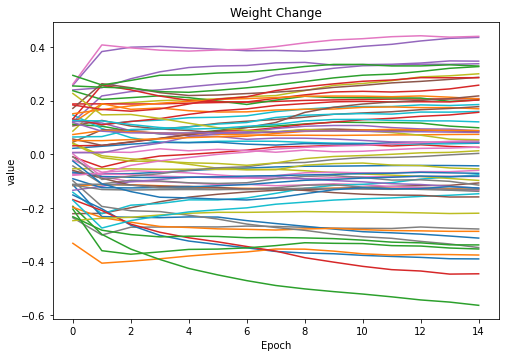

In [9]:
# write your code here
# print(output_node_w)
x= np.arange(0,len(output_node_w))
fig = plt.figure(figsize=(8,12))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
plt.subplot(2,1,1)
plt.plot(x, output_node_w[:,:,0])
plt.title('Weight Change')
plt.xlabel("Epoch") 
plt.ylabel("value") 


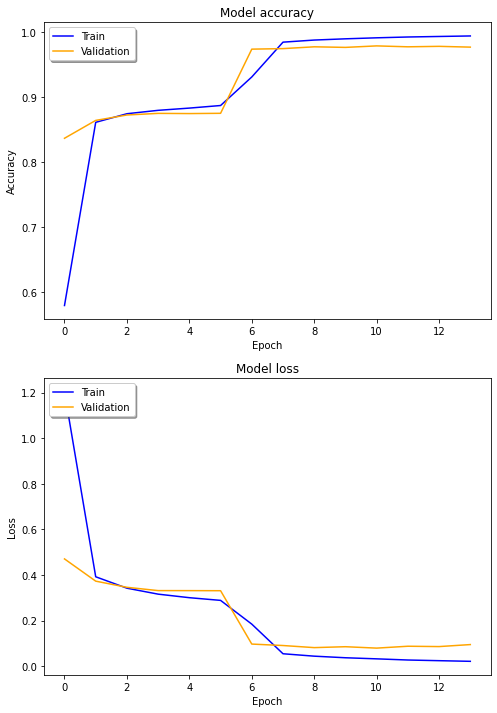

In [10]:
# write your code here
x= np.arange(0,len(train_acc))
fig = plt.figure(figsize=(8,12))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
plt.subplot(2,1,1)
plt.plot(x, train_acc, color='Blue', label='Train')
plt.plot(x, test_acc, color='Orange', label='Validation')
plt.title('Model accuracy')
plt.xlabel("Epoch") 
plt.ylabel("Accuracy") 

plt.legend(loc='upper left', shadow=True) 

plt.subplot(2,1,2)
plt.plot(x, train_loss, color='Blue', label='Train')
plt.plot(x, test_loss, color='Orange', label='Validation')
plt.title('Model loss')
plt.xlabel("Epoch") 
plt.ylabel("Loss") 

plt.legend(loc='upper left', shadow=True) 